# Prediction of Studens Dropout and academic success

A Project by:<br>
Cristal Rivera <br> 
Anton Donle<br>|

## 1. Problem Definition and dataset selection

Clearly define the problem statement by explaining its context and relevance.
* Justify the choice of dataset and discuss its potential to address the problem.

In [1]:
#Import Required Dependencies
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib as plt
import seaborn as sns

In [2]:
#Load Dataset, seperate on ;
data = pd.read_csv('data.csv', sep = ';')

In [3]:
#look at data
data[0:100]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,1,9119,1,1,130.0,26,38,3,...,0,5,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled
96,1,1,5,9773,1,1,135.0,1,37,1,...,0,6,6,6,13.333333,0,8.9,1.4,3.51,Graduate
97,1,1,5,9500,1,1,132.0,1,37,37,...,0,8,9,8,14.477778,0,12.4,0.5,1.79,Graduate
98,1,1,1,9085,1,1,135.0,1,1,2,...,0,5,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled


## 2. Exploratory Data Analysis

### 2.1. General Feature analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
#checking for missing values
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

In [ ]:
#checking for duplicates
data.duplicated().sum()

0

### 2.2 Correlation between Columns

In [11]:
#create new data frame without Target variable
data_without_target = data.drop(['Target'], axis = 1) 
#Make a correlation matrix
corr = data_without_target.corr()
corr.style.background_gradient(cmap='coolwarm')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.021534,0.018774,-0.025665,-0.058753,0.045951,0.294614,-0.038504,0.046855,0.053664,0.045

We can see that there is a very big correlation between credits in the first and second semester (graded, evaluated and approved). <br>
We should maybe combine them into one or two categories (credits 1. sem, credits 2. sem)<br>
There is a very large correlation between nationality and International which makes sense and we should probably remove one of them.<br>
There is a large correlation between age and marital status + application mode<br>

In [12]:
#create data for curricular columns
curricular_data = data_without_target.filter(like ="Curricular", axis=1)

#Make a correlation matrix
corr = curricular_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
Curricular units 1st sem (credited),1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256
Curricular units 1st sem (enrolled),0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547
Curricular units 1st sem (evaluations),0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296
Curricular units 1st sem (approved),0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983
Curricular units 1st sem (grade),0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076
Curricular units 1st sem (without evaluations),0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261
Curricular units 2nd sem (credited),0.944811,0.753747,0.522187,0.607661,0.113937,0.117359,1.000000,0.676258,0.430978,0.519081,0.129770,0.070148
Curricular units 2nd sem (enrolled),0.644826,0.942627,0.611842,0.733772,0.406167,0.109924,0.676258,1.000000,0.604821,0.703258,0.395135,0.067697
Curricular units 2nd sem (evaluations),0.427845,0.599567,0.778863,0.539934,0.487236,0.144683,0.430978,0.604821,1.000000,0.463535,0.453394,0.144877
Curricular units 2nd sem (approved),0.490478,0.673341,0.442265,0.904002,0.673335,-0.013070,0.519081,0.703258,0.463535,1.000000,0.760804,-0.061567


In [13]:
##Create correlation table with values and not a plot
correlation_matrix = data_without_target.corr()
# Remove self-correlation (set diagonal values to NaN)
np.fill_diagonal(correlation_matrix.values, np.nan)
#treshold to filter the confusion matrix with the correlations that are higher to this value
threshold = 0.5
# Find correlated pairs (without taking absolute values)
high_corr_pairs = correlation_matrix.stack().reset_index() #transform to a DF
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
# Filter to keep both high positive and high negative correlations
filtered_corr = high_corr_pairs[
    (high_corr_pairs['Correlation'] > threshold) | (high_corr_pairs['Correlation'] < -threshold)
].sort_values(by="Correlation", ascending=False)

# Display the results
filtered_corr[::2]

,Feature_1,Feature_2,Correlation
761,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.944811
1002,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),0.942627
360,Mother's occupation,Father's occupation,0.910472
1074,Curricular units 2nd sem (approved),Curricular units 1st sem (approved),0.904002
1110,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),0.837170
264,Nacionality,International,0.790935
1038,Curricular units 2nd sem (evaluations),Curricular units 1st sem (evaluations),0.778863
756,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774344
862,Curricular units 1st sem (approved),Curricular units 1st sem (enrolled),0.769083
1080,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.760804


We saw there is a high correlation between the curricular columns. 

Based on this table we can see the variables that are correlated and that we can decide to either remove one of those or merge them like the curricular columns.

Interpreting Economic Indicators:

Unemployment Rate: Reflects the percentage of the labor force that is unemployed at the time of the student's enrollment. A higher unemployment rate might influence a student's decision to pursue higher education or affect their financial stability. Inflation Rate: Indicates the rate at which the general level of prices for goods and services is rising. High inflation can impact the cost of living and educational expenses. GDP (Gross Domestic Product): Represents the economic performance of the country. A higher GDP may correlate with better funding for educational institutions and more opportunities for students.#Review of the three external economic variables:



In [14]:
economic_var = data_without_target[['Unemployment rate','Inflation rate','GDP']]
economic_var

,Unemployment rate,Inflation rate,GDP
0,10.8,1.4,1.74
1,13.9,-0.3,0.79
2,10.8,1.4,1.74
3,9.4,-0.8,-3.12
4,13.9,-0.3,0.79
...,...,...,...
4419,15.5,2.8,-4.06
4420,11.1,0.6,2.02
4421,13.9,-0.3,0.79
4422,9.4,-0.8,-3.12


### 2.3. Further Variable Analysis


In [ ]:
data.value_counts("International")

International
0    4314
1     110
Name: count, dtype: int64

In [ ]:
data.value_counts("Nacionality")

Nacionality
1      4314
41       38
26       14
6        13
22       13
24        5
11        3
103       3
100       3
105       2
101       2
62        2
25        2
2         2
21        2
32        1
17        1
14        1
13        1
108       1
109       1
Name: count, dtype: int64

In [ ]:
data.value_counts("Mother's qualification")

Mother's qualification
1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
39       8
9        8
41       6
43       4
6        4
42       4
11       3
29       3
30       3
10       3
35       3
36       3
14       2
26       1
27       1
22       1
18       1
44       1
Name: count, dtype: int64

In [ ]:
data.value_counts("Father's qualification")

Father's qualification
37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
30       4
14       4
22       4
29       3
41       2
43       2
35       2
26       2
10       2
6        2
33       1
31       1
27       1
25       1
20       1
18       1
13       1
42       1
44       1
Name: count, dtype: int64

### 2.4. Target Variable

In [15]:
#Check for class balance
n_graduate, n_dropout, n_enrolled = data.value_counts('Target')

In [16]:
n = n_graduate + n_dropout + n_enrolled
proportion_g = n_graduate/n
proportion_d = n_dropout/n
proportion_e = n_enrolled/n
print(proportion_g, proportion_d, proportion_e)

0.4993218806509946 0.3212025316455696 0.1794755877034358


We observe the following pattern of our target label: <br>
Graduate: 2209 (0.49) <br>
Dropout: 1421 (0.32)<br>
Enrolled: 794 (0.17)<br>
First number is occurence, second is frequency
There is a class imbalance.

C:\Users\tosch\AppData\Local\Temp\ipykernel_12884\503346687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette='rocket')


<Axes: xlabel='Target', ylabel='count'>

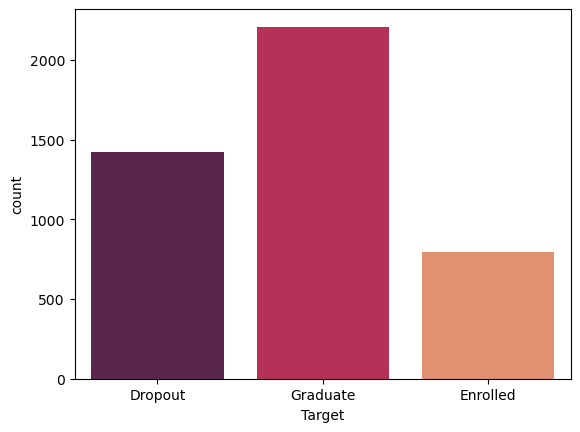

In [17]:
sns.set_palette("pastel")
#sns.histplot(data = data, x = "Target" )
sns.countplot(x='Target', data=data, palette='rocket')


array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>],
       [<Axes: title={'center': 'Previous qualification'}>,
        <Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>],
       [<Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>],
       [<Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>,
   

c:\Users\tosch\miniconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\tosch\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


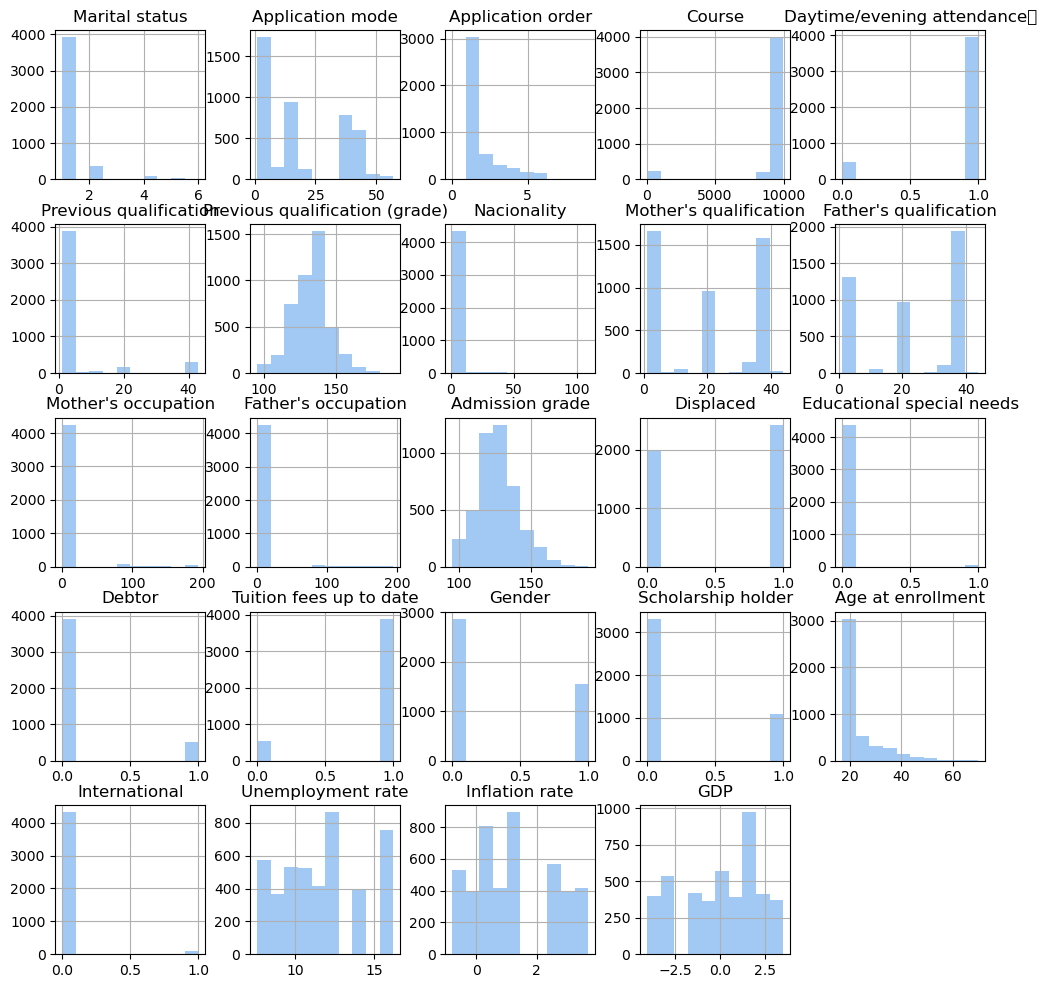

In [18]:
# Exclude columns that contain "Curricular" in their header
no_curricular_data = data_without_target.loc[:, ~data_without_target.columns.str.contains("Curricular", case=False)]


no_curricular_data.hist(figsize=(12,12))

### 2.5. Conclusion

1. Resolve Economic Situation (GPD, Inflation Rate, Unenmployment Rate)
2. Resolve International + Nationality
3. Maritial Status + Age of enrollment, Age of enrollment + application mode
4. Resolve Curricular units
5. Resolve Mothers + Fathers occupation
6. Replace numbers that encode something by string for what they encode
7. undo encoding

## 3. ML before Feature Engineering

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split    

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import GaussianNB


In [20]:
#We will drop people with target value == Enrolled
enrolled = data[data["Target"] == "Enrolled"].index
data.drop(enrolled,inplace=True)
data["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [21]:
data_before_engineering = data

#Define X and y 
X = data_before_engineering["Target"]
y = data_before_engineering.drop(['Target'], axis = 1) 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

### 3.1. SVM

In [22]:
def train_and_predict_SVM(X_train, y_train, y_test):
    #Initilize a SVM
    clf = SVC(random_state=42)
    #Fit it to the training data
    clf.fit(y_train,X_train) 
    #Predicate on the testdata
    x_pred = clf.predict(y_test)
    return(x_pred)

In [23]:
x_pred = train_and_predict_SVM(X_train, y_train, y_test)
acc = accuracy_score(X_test, x_pred)
print(acc)
confusion_matrix(X_test, x_pred)

0.6211453744493393


array([[  0, 344],
       [  0, 564]], dtype=int64)

### 3.2. KNN

In [24]:
def train_and_predict_KNN(X_train, y_train, y_test, n):
    #Initilize a KNN
    knn = KNeighborsClassifier(n_neighbors=n)
    #Fit it to the training data
    knn.fit(y_train,X_train) 
    #Predicate on the testdata
    x_pred = knn.predict(y_test)
    #Check Accuracy
    return(x_pred)

In [25]:
n = 3
x_pred= train_and_predict_KNN(X_train, y_train, y_test, n)
acc = accuracy_score(X_test, x_pred)
print(acc)
confusion_matrix(X_test, x_pred)

0.7731277533039648


array([[213, 131],
       [ 75, 489]], dtype=int64)

### 3.3. Logistic Regression

In [26]:
def train_and_predict_LR(X_train, y_train, y_test):
    #Initilize a LR
    clf = LogisticRegression(random_state=42,max_iter = 50)
    #Fit it to the training data
    clf.fit(y_train,X_train) 
    #Predicate on the testdata
    x_pred = clf.predict(y_test)
    return x_pred

In [27]:
x_pred = train_and_predict_LR(X_train, y_train, y_test)
acc = accuracy_score(X_test, x_pred)
print(acc)
print(confusion_matrix(X_test, x_pred))

0.8072687224669604
[[234 110]
 [ 65 499]]


c:\Users\tosch\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.4. Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier


def train_and_predict_DTC(X_train, y_train, y_test):

    #Initilize a DTC
    clf = DecisionTreeClassifier(random_state=42)
    #Fit it to the training data
    clf.fit(y_train,X_train) 
    #Predicate on the testdata
    x_pred = clf.predict(y_test)
    return x_pred

In [29]:
x_pred = train_and_predict_DTC(X_train, y_train, y_test)
acc = accuracy_score(X_test, x_pred)
print(acc)
print(confusion_matrix(X_test, x_pred))

0.8513215859030837
[[276  68]
 [ 67 497]]


### 3.5. Naive Bayes

In [30]:
def train_and_predict_GNB(X_train, y_train, y_test):
    #Initilize a SVM
    gnb = GaussianNB()
    #Fit it to the training data
    gnb.fit(y_train,X_train) 
    #Predicate on the testdata
    x_pred = gnb.predict(y_test)
    #Check Accuracy
    accuracy = accuracy_score(x_pred, X_test)
    return x_pred

In [31]:
x_pred = train_and_predict_GNB(X_train, y_train, y_test)
acc = accuracy_score(X_test, x_pred)
print(acc)
print(confusion_matrix(X_test, x_pred))

0.8425110132158591
[[249  95]
 [ 48 516]]


## 4. Feature Engineering

In [32]:
#Translate Target to 0 or 1 for SVM 
#data.replace("Dropout", 0)
#data.replace("Graduate", 1)
""

''

Since Admission grade and previous qualification(grade) have high correlation -> Remove previous qualification(grade) <br>
Age at enrollment + Appplication mode -> Remove Application Mode <br>
Age at enrollment + Maritial Status -> Remove Maritial Status <br>
Join Curricular Units first and second semester for each category -> maybe further remove approved/enrolled <br>
International + Nationality -> Remove Nationality<br>
Mothers Occupation and Fathers Occupation -> Remove Fathers Occupation<br>
Mothers Education and Fathers Edducation -> Remove Fathers Education<br>


Course + Daytime/evening -> Remove Daytime/evening (Maybe dont because its only a slight negative correlation)<br>


In [33]:
#Here we will remove the previously mentioned columns
data.drop(columns = ["Previous qualification (grade)", "Marital status", "Nacionality", "Father's qualification", "Father's occupation"], inplace = True)

In [34]:
#Here we will join the curricular units
#Get the average of the credits columns of 1st sem and 2nd sem

# categories of name:

data['Curricular units year (credited)'] = (data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)'])/2
data['Curricular units year (enrolled)'] = (data['Curricular units 1st sem (enrolled)'] + data['Curricular units 2nd sem (enrolled)'])/2
data['Curricular units year (evaluations)'] = (data['Curricular units 1st sem (evaluations)'] + data['Curricular units 2nd sem (evaluations)'])/2
data['Curricular units year (approved)'] = (data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)'])/2
data['Curricular units year (grade)'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)'])/2
data['Curricular units year (without evaluations)'] = (data['Curricular units 1st sem (without evaluations)'] + data['Curricular units 2nd sem (without evaluations)'])/2

data.drop(columns = ['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 2nd sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (evaluations)',
                 'Curricular units 1st sem (approved)','Curricular units 2nd sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], inplace = True)

## 5 Machine Learning after Engineering

## 6. Evaluation & Interpretation

## 7. Conclusion